### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
9Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format='svg'
%matplotlib inline
rcParams['figure.figsize']=8, 6

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [16]:
data = boston.data
feature_names = boston.feature_names
price = boston.target

In [4]:
X = pd.DataFrame(data, columns = feature_names)

In [6]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler(with_mean=False)

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [52]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne
X_train_tsne.shape

C:\Users\ia_sv\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(404, 2)

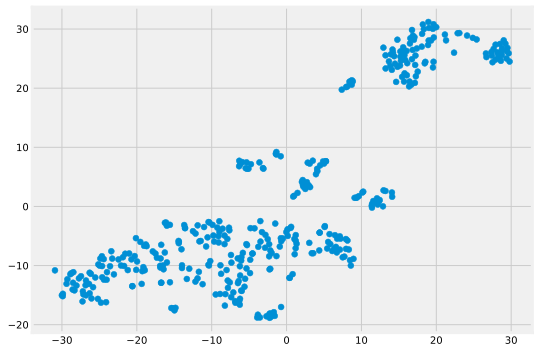

In [53]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [31]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [36]:
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

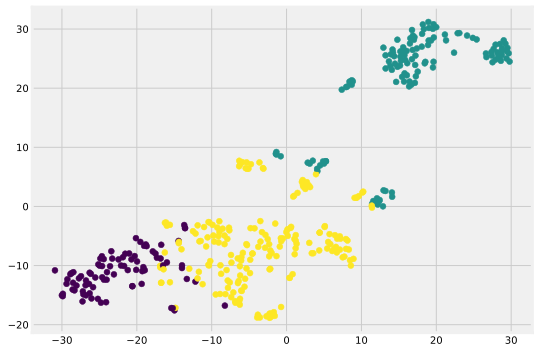

In [56]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)

In [57]:
y_train.mean()

22.796534653465343

In [61]:
y_train[labels_train == 0].mean()

27.78837209302326

In [60]:
y_train[labels_train == 1].mean()

16.165354330708663

In [62]:
y_train[labels_train == 2].mean()

24.958115183246072

In [63]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [64]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [65]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367

### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [70]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne
X_test_tsne.shape

C:\Users\ia_sv\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(102, 2)

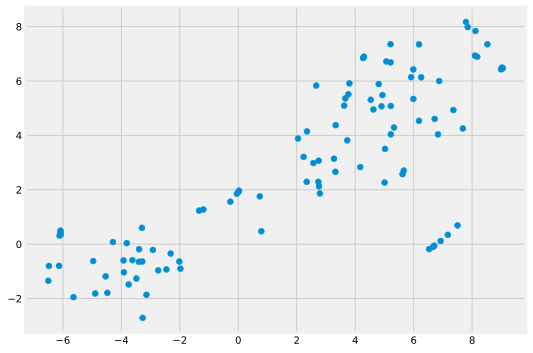

In [71]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1])

In [72]:
labels_test = kmeans.fit_predict(X_test_scaled)
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

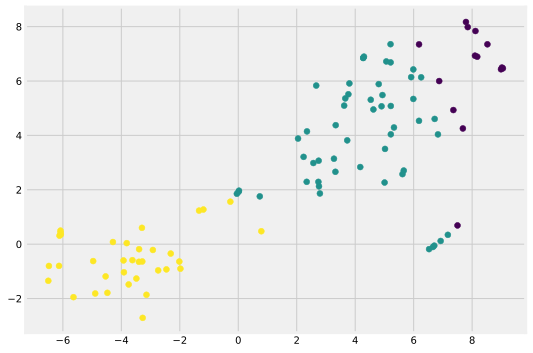

In [73]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=labels_test)

In [74]:
y_test.mean()

21.488235294117644

In [76]:
y_test[labels_test == 0].mean()

33.871428571428574

In [77]:
y_test[labels_test == 1].mean()

21.552830188679245

In [78]:
y_test[labels_test == 2].mean()

16.43714285714286

In [79]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.08618571428571427

In [80]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

0.25200716981132076

In [81]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

10.165531142857143